In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.6.0


In [52]:
df = pd.read_pickle('bpm_big_data_ex_std.plk') 
df

,bunch_charge,num_bunches,V125,H125,connection,reps,C1,C2,C3,C4,...,B605PH_std,B605PV_std,B609PH_std,B609PV_std,B610PH_std,B610PV_std,B612PH_std,B612PV_std,B613PH_std,B613PV_std
0,250,50,-0.3452,0.5357,Upstream,300,0.125787,0.130386,0.523158,0.448682,...,242.156789,219.597515,161.013838,157.417929,213.004640,157.617959,246.976467,241.559555,189.946300,142.303250
1,250,50,-0.3452,0.5357,Upstream,300,0.124891,0.122449,0.504881,0.429264,...,288.396030,216.088618,139.333850,156.589939,192.881741,140.235060,241.478883,222.563772,160.001185,165.372739
2,250,50,-0.3452,0.5357,Upstream,300,0.124635,0.120322,0.505017,0.427904,...,333.283321,164.506662,150.401965,148.781042,230.306773,170.802851,260.509903,204.933165,179.676109,150.015966
3,250,50,-0.3452,0.5357,Upstream,300,0.118786,0.116632,0.478015,0.401456,...,337.385941,210.200329,146.325961,157.866857,174.420867,174.777828,288.771241,206.283748,192.492028,162.731326
4,250,50,-0.3452,0.5357,Upstream,300,0.133275,0.131215,0.530097,0.450509,...,320.810397,219.806615,147.005299,175.304348,198.113168,175.360509,222.726873,192.976742,175.453032,139.124687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17595,250,1,0.0000,-1.0000,Downstream,300,0.164531,0.213478,0.194903,0.181066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17596,250,1,0.0000,-1.0000,Downstream,300,0.150945,0.206443,0.184874,0.175678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17597,250,1,0.0000,-1.0000,Downstream,300,0.144606,0.196726,0.178423,0.168635,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17598,250,1,0.0000,-1.0000,Downstream,300,0.144625,0.196734,0.177356,0.169459,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
# Define variable to predict
output = 'B441PV_std'

df = df[['bunch_charge', 'num_bunches', 'V125', 'H125', 'connection', 'reps', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', output]]
convert_dict = {'bunch_charge': int, 'num_bunches': float, 'reps': float} 
df = df.astype(convert_dict)
df

,bunch_charge,num_bunches,V125,H125,connection,reps,C1,C2,C3,C4,C5,C6,C7,C8,B441PV_std
0,250,50.0,-0.3452,0.5357,Upstream,300.0,0.125787,0.130386,0.523158,0.448682,0.145888,0.057161,0.024682,0.044126,138.656559
1,250,50.0,-0.3452,0.5357,Upstream,300.0,0.124891,0.122449,0.504881,0.429264,0.137149,0.051645,0.022580,0.039295,109.398381
2,250,50.0,-0.3452,0.5357,Upstream,300.0,0.124635,0.120322,0.505017,0.427904,0.136774,0.050708,0.022454,0.038037,112.492225
3,250,50.0,-0.3452,0.5357,Upstream,300.0,0.118786,0.116632,0.478015,0.401456,0.127130,0.045398,0.020581,0.031735,115.484824
4,250,50.0,-0.3452,0.5357,Upstream,300.0,0.133275,0.131215,0.530097,0.450509,0.146080,0.055430,0.024999,0.041351,120.711042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17595,250,1.0,0.0000,-1.0000,Downstream,300.0,0.164531,0.213478,0.194903,0.181066,0.155166,0.128281,0.129489,0.117805,0.000000
17596,250,1.0,0.0000,-1.0000,Downstream,300.0,0.150945,0.206443,0.184874,0.175678,0.150810,0.122212,0.130741,0.113964,0.000000
17597,250,1.0,0.0000,-1.0000,Downstream,300.0,0.144606,0.196726,0.178423,0.168635,0.147421,0.119185,0.127410,0.109986,0.000000
17598,250,1.0,0.0000,-1.0000,Downstream,300.0,0.144625,0.196734,0.177356,0.169459,0.146780,0.120936,0.129253,0.111885,0.000000


In [54]:
df = df[df.bunch_charge == 250]
df = df[df.num_bunches == 50]
df = df[df.H125 == 0.0]
df

,bunch_charge,num_bunches,V125,H125,connection,reps,C1,C2,C3,C4,C5,C6,C7,C8,B441PV_std
2200,250,50.0,0.0,0.0,Upstream,300.0,0.113871,0.117484,0.064260,0.143868,0.126589,0.086457,0.055663,0.181608,145.684264
2201,250,50.0,0.0,0.0,Upstream,300.0,0.126453,0.132639,0.073059,0.159190,0.140515,0.093193,0.061958,0.197487,139.508992
2202,250,50.0,0.0,0.0,Upstream,300.0,0.118793,0.121865,0.066753,0.147087,0.132378,0.088823,0.058273,0.186219,144.984296
2203,250,50.0,0.0,0.0,Upstream,300.0,0.125912,0.131790,0.075906,0.157550,0.134118,0.089243,0.061570,0.188520,140.962569
2204,250,50.0,0.0,0.0,Upstream,300.0,0.113442,0.116032,0.066224,0.144338,0.128033,0.088431,0.056948,0.180575,168.539298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,250,50.0,1.0,0.0,Downstream,300.0,0.983956,0.905771,0.893316,0.962085,1.090817,0.331636,0.253936,0.650350,330.117116
11896,250,50.0,1.0,0.0,Downstream,300.0,1.007670,0.918491,0.906920,0.974603,1.096320,0.334751,0.256812,0.652036,339.860278
11897,250,50.0,1.0,0.0,Downstream,300.0,1.025271,0.941159,0.933462,1.003040,1.132950,0.346514,0.266976,0.687335,290.108216
11898,250,50.0,1.0,0.0,Downstream,300.0,1.004542,0.918050,0.913462,0.988312,1.120953,0.338760,0.260956,0.668730,338.711689


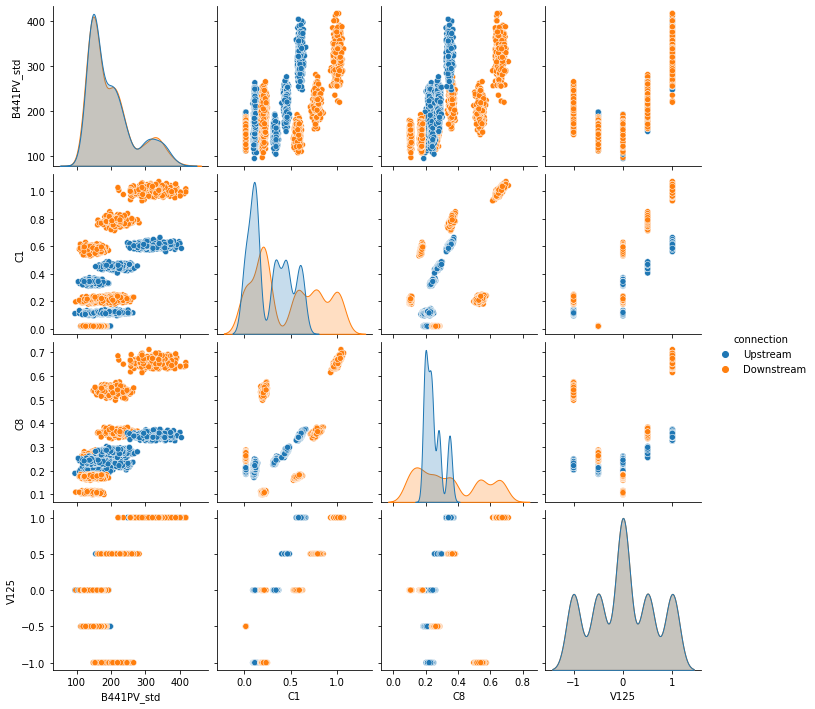

In [55]:
sns.pairplot(df[[output, 'C1', 'C8', 'V125', 'connection']], diag_kind='kde', hue='connection') # Just plot some relationships

In [56]:
# Change to categorical data
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['connection'])
df.tail()

,bunch_charge,num_bunches,V125,H125,reps,C1,C2,C3,C4,C5,C6,C7,C8,B441PV_std,Downstream,Upstream
11895,250,50.0,1.0,0.0,300.0,0.983956,0.905771,0.893316,0.962085,1.090817,0.331636,0.253936,0.650350,330.117116,1,0
11896,250,50.0,1.0,0.0,300.0,1.007670,0.918491,0.906920,0.974603,1.096320,0.334751,0.256812,0.652036,339.860278,1,0
11897,250,50.0,1.0,0.0,300.0,1.025271,0.941159,0.933462,1.003040,1.132950,0.346514,0.266976,0.687335,290.108216,1,0
11898,250,50.0,1.0,0.0,300.0,1.004542,0.918050,0.913462,0.988312,1.120953,0.338760,0.260956,0.668730,338.711689,1,0
11899,250,50.0,1.0,0.0,300.0,1.033130,0.944760,0.931438,0.998833,1.126401,0.342818,0.266859,0.673645,320.332941,1,0


In [57]:
# Split into train and test datasets
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_dataset.info()
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2880 entries, 5103 to 2246
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bunch_charge  2880 non-null   int64  
 1   num_bunches   2880 non-null   float64
 2   V125          2880 non-null   float64
 3   H125          2880 non-null   float64
 4   reps          2880 non-null   float64
 5   C1            2880 non-null   float64
 6   C2            2880 non-null   float64
 7   C3            2880 non-null   float64
 8   C4            2880 non-null   float64
 9   C5            2880 non-null   float64
 10  C6            2880 non-null   float64
 11  C7            2880 non-null   float64
 12  C8            2880 non-null   float64
 13  B441PV_std    2880 non-null   float64
 14  Downstream    2880 non-null   uint8  
 15  Upstream      2880 non-null   uint8  
dtypes: float64(13), int64(1), uint8(2)
memory usage: 343.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 720

In [58]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bunch_charge,2880.0,250.000000,0.000000,250.000000,250.000000,250.000000,250.000000,250.000000
num_bunches,2880.0,50.000000,0.000000,50.000000,50.000000,50.000000,50.000000,50.000000
V125,2880.0,0.007639,0.645026,-1.000000,-0.500000,0.000000,0.500000,1.000000
H125,2880.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
reps,2880.0,300.000000,0.000000,300.000000,300.000000,300.000000,300.000000,300.000000
C1,2880.0,0.370755,0.303086,0.016376,0.116024,0.278717,0.591317,1.068441
C2,2880.0,0.369023,0.282550,0.018803,0.129881,0.298143,0.558510,0.970462
C3,2880.0,0.314492,0.262742,0.022987,0.073702,0.246249,0.455241,0.959478
C4,2880.0,0.376241,0.275119,0.031799,0.143963,0.290092,0.499855,1.034430
C5,2880.0,0.401929,0.311462,0.040446,0.140884,0.325699,0.512641,1.172247


In [59]:
# Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(output)
test_labels = test_features.pop(output)

In [60]:
# Linear Regression
# Let's do multiple inputs 
# Normalization layer
normalizer_array = np.array(train_features[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'V125', 'Downstream', 'Upstream']])
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(normalizer_array))
print(normalizer.mean.numpy())

[[0.37075508 0.369023   0.31449243 0.37624103 0.40192938 0.14606531
  0.1107455  0.29987088 0.00763889 0.50312513 0.49687493]]


In [61]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 11)                23        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 12        
Total params: 35
Trainable params: 12
Non-trainable params: 23
_________________________________________________________________


In [62]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

In [63]:
%%time
early_stop =EarlyStopping(monitor='val_loss', min_delta=0.1, patience=50)
history = linear_model.fit(
    normalizer_array, train_labels, 
    epochs=1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2,
    callbacks=[early_stop])

CPU times: user 13.9 s, sys: 1.55 s, total: 15.5 s
Wall time: 10.3 s


In [64]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error,epoch
185,16.957451,498.332245,8.673807,17.815987,546.527527,9.035908,185
186,16.914875,498.069946,8.640731,18.100441,567.473938,9.188999,186
187,16.960983,502.181427,8.666897,17.924644,556.383423,9.065512,187
188,16.931437,498.550018,8.652201,17.894442,553.610535,9.063727,188
189,16.946236,501.899841,8.664145,17.870735,551.632324,9.051080,189


In [65]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [B441PV_var]')
  plt.ylim([0, 50])
  plt.legend()
  plt.grid(True)

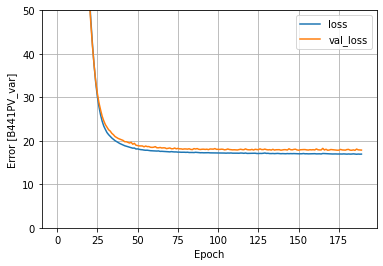

In [66]:
plot_loss(history)

In [67]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'V125', 'Downstream', 'Upstream']], test_labels, verbose=0)
test_results

{'linear_model': [16.48301124572754, 464.63909912109375, 8.586511611938477]}

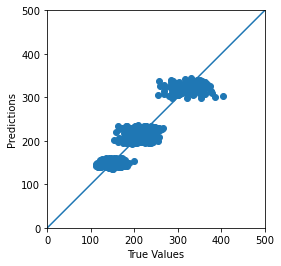

In [68]:
test_predictions_linear_model = linear_model.predict(test_features[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'V125', 'Downstream', 'Upstream']]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions_linear_model)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

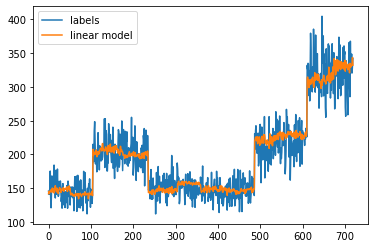

In [69]:
# Plot test labels and test predictiones vs sample #
plt.plot(np.array(test_labels), label='labels')
plt.plot(np.array(test_predictions_linear_model), label='linear model')
plt.legend()

In [70]:
# Now let's use a DNN
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(100, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0001),
               metrics=['mean_squared_error', 'mean_absolute_percentage_error'])
  return model

In [71]:
# Now lets do the full model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 11)                23        
_________________________________________________________________
dense_10 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 32)               

In [72]:
%%time
early_stop =EarlyStopping(monitor='val_loss', min_delta=0.1, patience=200)
history = dnn_model.fit(
    normalizer_array, train_labels,
    validation_split=0.2,
    verbose=0, epochs=1000,
    callbacks=[early_stop])

CPU times: user 1min 51s, sys: 22.9 s, total: 2min 14s
Wall time: 58.3 s


In [73]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_percentage_error,val_loss,val_mean_squared_error,val_mean_absolute_percentage_error,epoch
380,16.160410,453.903107,8.251873,17.388618,504.058044,8.782987,380
381,16.139975,453.758087,8.227242,17.422462,511.235626,8.794391,381
382,16.093773,452.300903,8.218637,17.407043,510.900391,8.744488,382
383,16.119286,450.566467,8.237197,17.455549,505.031097,8.893002,383
384,16.113356,450.232910,8.236419,17.488693,527.529297,8.695959,384


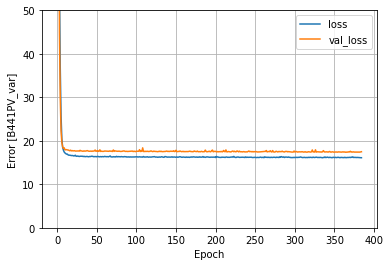

In [74]:
plot_loss(history)

In [75]:
test_results['dnn_model'] = dnn_model.evaluate(test_features[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'V125', 'Downstream', 'Upstream']], 
                                               test_labels, verbose=0)
test_results

{'linear_model': [16.48301124572754, 464.63909912109375, 8.586511611938477],
 'dnn_model': [15.917312622070312, 424.91510009765625, 8.179909706115723]}

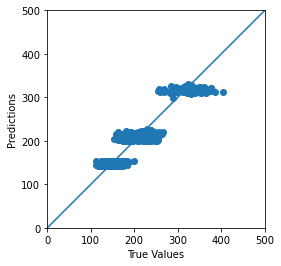

In [76]:
test_predictions_dnn_model = dnn_model.predict(test_features[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'V125', 'Downstream', 'Upstream']]).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions_dnn_model)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

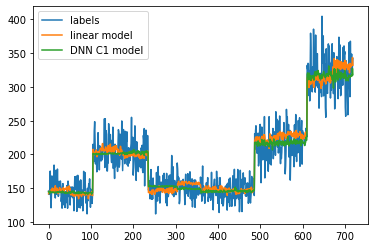

In [77]:
# Plot test labels and test predictiones vs sample #
plt.plot(np.array(test_labels), label='labels')
plt.plot(np.array(test_predictions_linear_model), label='linear model')
plt.plot(np.array(test_predictions_dnn_model), label='DNN C1 model')
plt.legend()

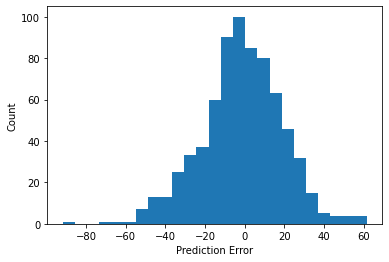

In [78]:
error = test_predictions_dnn_model - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

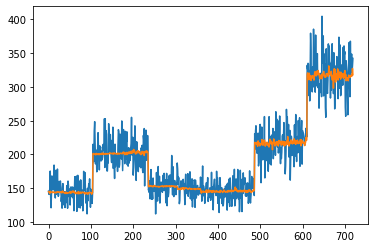

In [79]:
plt.plot(np.array(test_labels))
plt.plot(np.array(test_predictions_dnn_model))

In [80]:
# Let's compare the test results of the models
pd.DataFrame(test_results, index=['Mean absolute error', 'mean_squared_error', 'mean_absolute_percentage_error']).T

,Mean absolute error,mean_squared_error,mean_absolute_percentage_error
linear_model,16.483011,464.639099,8.586512
dnn_model,15.917313,424.915100,8.179910


Done!